# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress
from scipy import stats


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import requests

# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
    
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Fetch weather data for the city
        response = requests.get(city_url)
        city_weather = response.json()
        
         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
             # Append the City information into city_data list
        city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
       
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 2 of Set 1 | karkaralinsk
City not found. Skipping...
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | le port
Processing Record 5 of Set 1 | sao filipe
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | port macquarie
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | saleaula
City not found. Skipping...
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | umm lajj
Processing Record 19 of Set 1 | constitucion
Processing Record 20 of Set 1 | taolanaro
City not found. Ski

Processing Record 36 of Set 4 | maceio
Processing Record 37 of Set 4 | mao
Processing Record 38 of Set 4 | maniitsoq
Processing Record 39 of Set 4 | ostrovnoy
Processing Record 40 of Set 4 | solnechnyy
Processing Record 41 of Set 4 | faanui
Processing Record 42 of Set 4 | russell
Processing Record 43 of Set 4 | acajutla
Processing Record 44 of Set 4 | alexandria
Processing Record 45 of Set 4 | chongwe
Processing Record 46 of Set 4 | iguape
Processing Record 47 of Set 4 | kindu
Processing Record 48 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 49 of Set 4 | tahta
Processing Record 0 of Set 5 | doctor pedro p. pena
City not found. Skipping...
Processing Record 1 of Set 5 | kavaratti
Processing Record 2 of Set 5 | port lincoln
Processing Record 3 of Set 5 | mabaruma
Processing Record 4 of Set 5 | bur gabo
City not found. Skipping...
Processing Record 5 of Set 5 | rolla
Processing Record 6 of Set 5 | torbay
Processing Record 7 of Set 5 | te anau
Processing Record 8

City not found. Skipping...
Processing Record 29 of Set 8 | makakilo city
Processing Record 30 of Set 8 | estacion coahuila
Processing Record 31 of Set 8 | nushki
Processing Record 32 of Set 8 | rocha
Processing Record 33 of Set 8 | road town
Processing Record 34 of Set 8 | cap malheureux
Processing Record 35 of Set 8 | gisborne
Processing Record 36 of Set 8 | abu kamal
Processing Record 37 of Set 8 | tayu
Processing Record 38 of Set 8 | les cayes
Processing Record 39 of Set 8 | dergachi
Processing Record 40 of Set 8 | ust-maya
Processing Record 41 of Set 8 | huarmey
Processing Record 42 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 43 of Set 8 | brae
Processing Record 44 of Set 8 | maryville
Processing Record 45 of Set 8 | sfantu gheorghe
Processing Record 46 of Set 8 | aransas pass
Processing Record 47 of Set 8 | waw
Processing Record 48 of Set 8 | markova
Processing Record 49 of Set 8 | aflu
City not found. Skipping...
Processing Record 0 of Set 9 | llangefni


Processing Record 20 of Set 12 | barvinkove
Processing Record 21 of Set 12 | sassandra
Processing Record 22 of Set 12 | haines junction
Processing Record 23 of Set 12 | sabha
Processing Record 24 of Set 12 | tabukiniberu
City not found. Skipping...
Processing Record 25 of Set 12 | santa isabel
Processing Record 26 of Set 12 | dongkan
Processing Record 27 of Set 12 | bonoua
Processing Record 28 of Set 12 | husavik
Processing Record 29 of Set 12 | dzitankov
City not found. Skipping...
Processing Record 30 of Set 12 | tarko-sale
Processing Record 31 of Set 12 | lumeje
Processing Record 32 of Set 12 | santa engracia
Processing Record 33 of Set 12 | el salto
Processing Record 34 of Set 12 | dubbo
Processing Record 35 of Set 12 | elesbao veloso
Processing Record 36 of Set 12 | nador
Processing Record 37 of Set 12 | chipinge
Processing Record 38 of Set 12 | noumea
Processing Record 39 of Set 12 | kiruna
Processing Record 40 of Set 12 | mishelevka
Processing Record 41 of Set 12 | strezhevoy
Pr

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,18.99,62,79,3.13,ZA,1680103037
1,le port,-20.9373,55.2919,27.00,97,36,1.33,RE,1680103620
2,sao filipe,14.8961,-24.4956,26.28,56,83,2.03,CV,1680103620
3,saskylakh,71.9167,114.0833,-27.04,100,96,2.37,RU,1680103620
4,rikitea,-23.1203,-134.9692,26.27,74,97,2.18,PF,1680103620


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,18.99,62,79,3.13,ZA,1680103037
1,le port,-20.9373,55.2919,27.00,97,36,1.33,RE,1680103620
2,sao filipe,14.8961,-24.4956,26.28,56,83,2.03,CV,1680103620
3,saskylakh,71.9167,114.0833,-27.04,100,96,2.37,RU,1680103620
4,rikitea,-23.1203,-134.9692,26.27,74,97,2.18,PF,1680103620


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

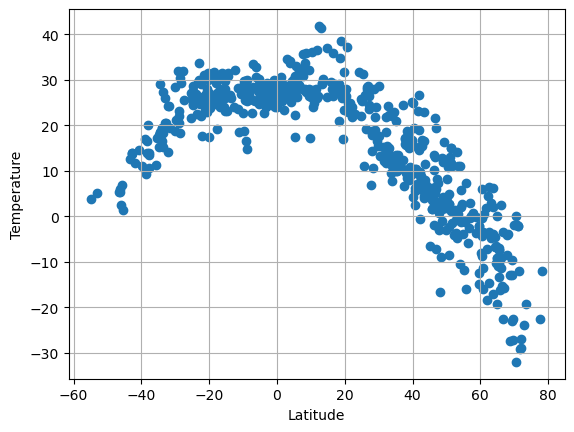

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Incorporate the other graph properties
plt.grid(True)


# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

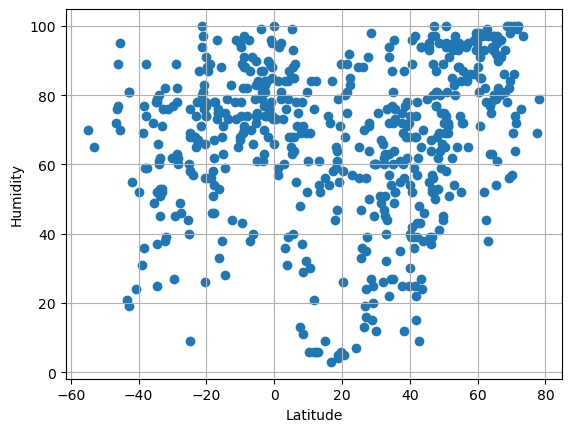

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

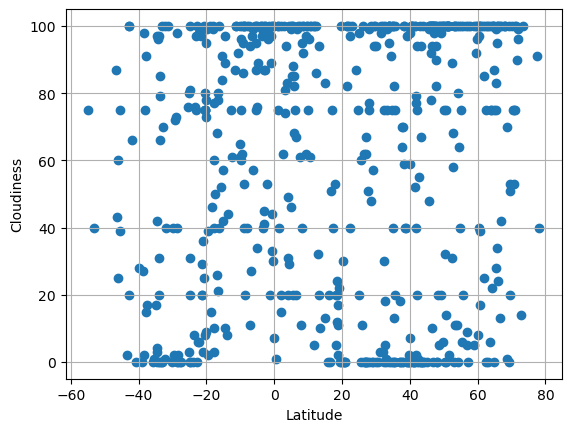

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

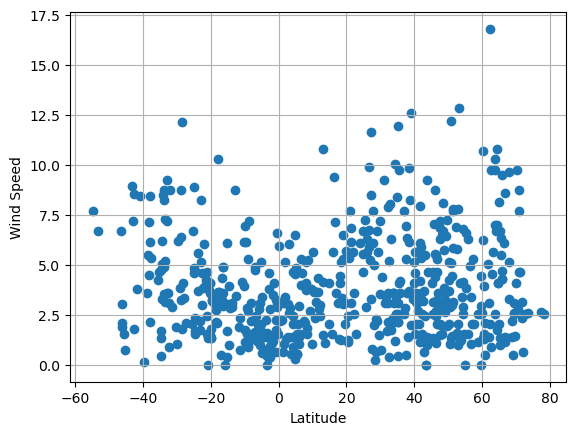

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df["Lat"], city_data_df["Max Temp"])
#regress_values = slope * city_data_df["Lat"] + intercept
#line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,sao filipe,14.8961,-24.4956,26.28,56,83,2.03,CV,1680103620
3,saskylakh,71.9167,114.0833,-27.04,100,96,2.37,RU,1680103620
9,jamestown,42.0970,-79.2353,7.53,57,94,5.36,US,1680103174
12,qaanaaq,77.4840,-69.3632,-22.67,69,91,2.67,GL,1680103623
13,katsuura,35.1333,140.3000,12.70,81,100,2.17,JP,1680103623


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,18.99,62,79,3.13,ZA,1680103037
1,le port,-20.9373,55.2919,27.00,97,36,1.33,RE,1680103620
4,rikitea,-23.1203,-134.9692,26.27,74,97,2.18,PF,1680103620
5,port macquarie,-31.4333,152.9167,19.38,76,100,2.88,AU,1680103621
6,ushuaia,-54.8000,-68.3000,3.81,70,75,7.72,AR,1680103519


###  Temperature vs. Latitude Linear Regression Plot

0.7943383264854786


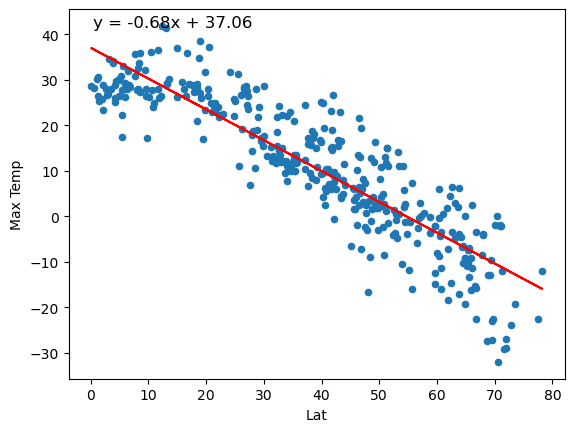

In [38]:
# Linear regression on Northern Hemisphere

slope, intercept, r_value, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
line = slope * northern_hemi_df['Lat'] + intercept

# Label plot and annotate the line equation
northern_hemi_df.plot.scatter(x='Lat', y='Max Temp')
plt.plot(northern_hemi_df['Lat'], line, color='red')

# Print r square value
print(r_value**2)
eqn = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(eqn, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)


# Show plot
plt.show()


0.479621979133268


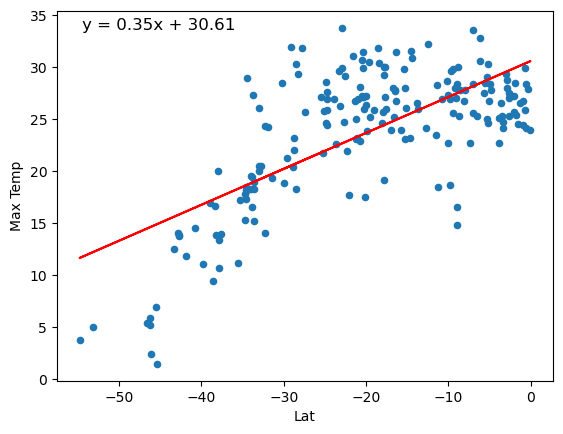

In [37]:
# Linear regression on Northern Hemisphere

slope, intercept, r_value, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
line = slope * southern_hemi_df['Lat'] + intercept

# Label plot and annotate the line equation
southern_hemi_df.plot.scatter(x='Lat', y='Max Temp')
plt.plot(southern_hemi_df['Lat'], line, color='red')

# Print r square value
print(r_value**2)
eqn = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(eqn, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)


# Show plot
plt.show()


**Discussion about the linear relationship:** There is a moderately negative correlation between temperature and latitude, meaning the higher the latitude, the colder the temperature. 

### Humidity vs. Latitude Linear Regression Plot

0.12999442842851613


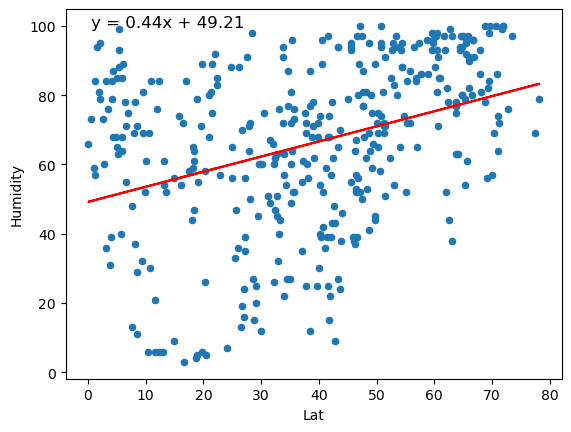

In [36]:
# Linear regression on Northern Hemisphere

slope, intercept, r_value, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
line = slope * northern_hemi_df['Lat'] + intercept

# Label plot and annotate the line equation
northern_hemi_df.plot.scatter(x='Lat', y='Humidity')
plt.plot(northern_hemi_df['Lat'], line, color='red')

# Print r square value
print(r_value**2)
eqn = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(eqn, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)


# Show plot
plt.show()


0.12499173330785521


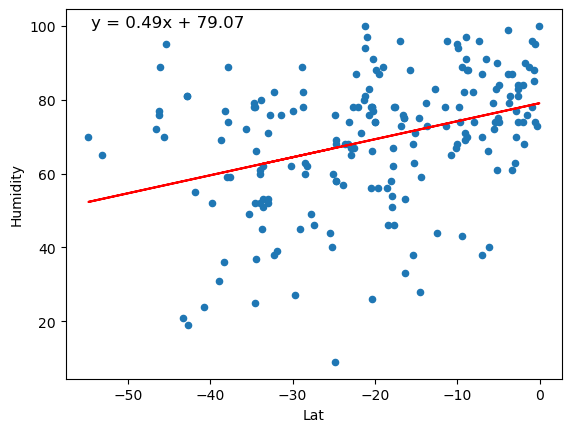

In [35]:
# Linear regression on Northern Hemisphere

slope, intercept, r_value, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
line = slope * southern_hemi_df['Lat'] + intercept

# Label plot and annotate the line equation
southern_hemi_df.plot.scatter(x='Lat', y='Humidity')
plt.plot(southern_hemi_df['Lat'], line, color='red')

# Print r square value
print(r_value**2)
eqn = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(eqn, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)


# Show plot
plt.show()


**Discussion about the linear relationship:** There does appear to be a moderate correlation between the absolute value of latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

0.007959664672850647


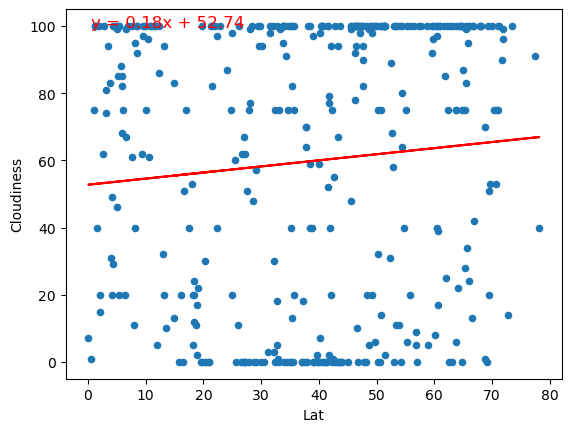

In [34]:
# Linear regression on Northern Hemisphere

slope, intercept, r_value, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
line = slope * northern_hemi_df['Lat'] + intercept

# Label plot and annotate the line equation
northern_hemi_df.plot.scatter(x='Lat', y='Cloudiness')
plt.plot(northern_hemi_df['Lat'], line, color='red')

# Print r square value
print(r_value**2)
eqn = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(eqn, xy=(0.05, 0.95), xycoords='axes fraction', color='red', fontsize=12)


# Show plot
plt.show()


0.13348935704196008


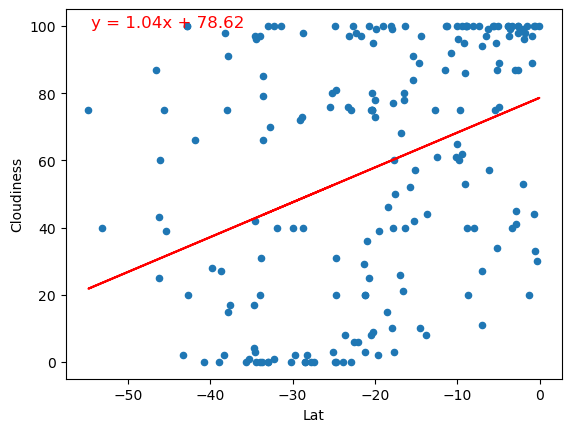

In [33]:
# Linear regression on Northern Hemisphere

slope, intercept, r_value, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
line = slope * southern_hemi_df['Lat'] + intercept

# Label plot and annotate the line equation
southern_hemi_df.plot.scatter(x='Lat', y='Cloudiness')
plt.plot(southern_hemi_df['Lat'], line, color='red')

# Print r square value
print(r_value**2)
eqn = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(eqn, xy=(0.05, 0.95), xycoords='axes fraction', color='red', fontsize=12)


# Show plot
plt.show()


**Discussion about the linear relationship:** The correlation is not strong between latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

0.01283439920292429


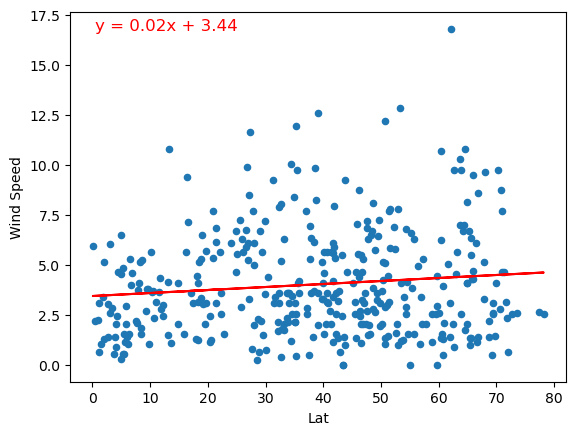

In [32]:
# Linear regression on Northern Hemisphere

slope, intercept, r_value, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
line = slope * northern_hemi_df['Lat'] + intercept

# Label plot and annotate the line equation
northern_hemi_df.plot.scatter(x='Lat', y='Wind Speed')
plt.plot(northern_hemi_df['Lat'], line, color='red')

# Print r square value
print(r_value**2)
eqn = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(eqn, xy=(0.05, 0.95), xycoords='axes fraction', color='red', fontsize=12)


# Show plot
plt.show()



0.1551909279250555


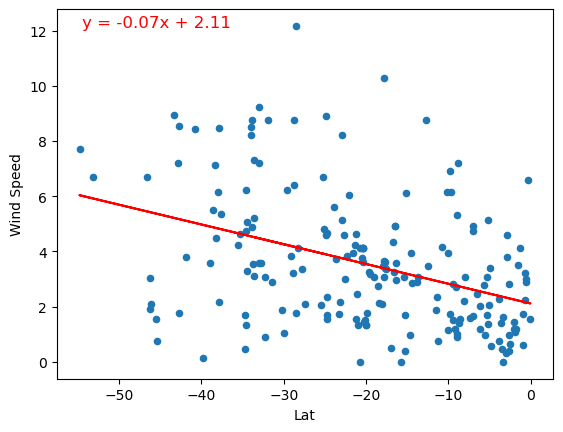

In [31]:
# Linear regression on Northern Hemisphere

slope, intercept, r_value, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
line = slope * southern_hemi_df['Lat'] + intercept

# Label plot and annotate the line equation
southern_hemi_df.plot.scatter(x='Lat', y='Wind Speed')
plt.plot(southern_hemi_df['Lat'], line, color='red')

# Print r square value
print(r_value**2)
eqn = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(eqn, xy=(0.05, 0.95), xycoords='axes fraction', color='red', fontsize=12)


# Show plot
plt.show()


**Discussion about the linear relationship:** Very minute positive correlation between latitude and wind speed.